# Heros of Pymoli Analysis


In [7]:
# Dependencies and Setup
import pandas as pd

# File to Load (Remember to Change These)
file_to_load = "Datasets/Game_Purchase_Dataset.csv"

# Read Purchasing File and store into Pandas data frame
purchase_dataset = pd.read_csv(file_to_load)

purchase_dataset.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


### Player Count
Display the total number of players

In [8]:
player_count = purchase_dataset["SN"].nunique()

print(f"There are a total of {player_count} players in this dataset.")

There are a total of 576 players in this dataset.


### Purchasing Analysis (Total)

Run basic calculations to obtain number of unique items, average price, etc.

Create a summary data frame to hold the results

Optional: give the displayed data cleaner formatting

Display the summary data frame

In [9]:
# Create a new dataset with just the game data

items_dataset = purchase_dataset[["Item Name", "Price", "Item ID", "Purchase ID"]]

items_dataset.to_csv("Datasets/items_dataset.csv", index=False)

items_dataset.head()

,Item Name,Price,Item ID,Purchase ID
0,"Extraction, Quickblade Of Trembling Hands",3.53,108,0
1,Frenzied Scimitar,1.56,143,1
2,Final Critic,4.88,92,2
3,Blindscythe,3.27,100,3
4,Fury,1.44,131,4


In [10]:
# Number of unique game titles in the dataset.

unique_items = items_dataset["Item Name"].nunique()

print(f"The total number of unique game titles in this dataset are {unique_items}.")

The total number of unique game titles in this dataset are 179.


In [11]:
# The average price per dollar across all unique game titles.

unique_items = items_dataset.drop_duplicates(subset=["Item ID", "Item Name"])
avg_item_price = round(unique_items["Price"].mean(), 2)

print(f" The average price per game title is ${avg_item_price}.")

 The average price per game title is $3.04.


In [12]:
# Find the maximum price for a game title.

unique_items = items_dataset.drop_duplicates(subset=["Item ID", "Item Name"])
max_item_price = unique_items["Price"].max()

print(f"${max_item_price} is the highest price for a game title.")

$4.99 is the highest price for a game title.


In [13]:
# Find the minimum price for a game title.

unique_title = items_dataset["Item Name"].nunique()
min_item_price = round(unique_items["Price"].min(), 2)

print(f"The lowest game title price is ${min_item_price}.")

The lowest game title price is $1.0.


In [14]:
# Create a summary dataframe with all of the statistics

# Ensure unique items only
unique_items = items_dataset.drop_duplicates(subset=["Item ID", "Item Name"])

# Calculate stats
summary_stats = {
    "Number of Unique Titles": [unique_items["Item ID"].nunique()],
    "Average Price": [round(unique_items["Price"].mean(), 2)],
    "Max Price": [round(unique_items["Price"].max(), 2)],
    "Min Price": [round(unique_items["Price"].min(), 2)]
}

# Create summary DataFrame
summary_df = pd.DataFrame(summary_stats)

# Optional: format as currency
summary_df["Average Price"] = summary_df["Average Price"].map("${:.2f}".format)
summary_df["Max Price"] = summary_df["Max Price"].map("${:.2f}".format)
summary_df["Min Price"] = summary_df["Min Price"].map("${:.2f}".format)

summary_df

,Number of Unique Titles,Average Price,Max Price,Min Price
0,179,$3.04,$4.99,$1.00


<AxesSubplot:title={'center':'Purchase Count by Age Group and Gender'}, xlabel='Age Group'>

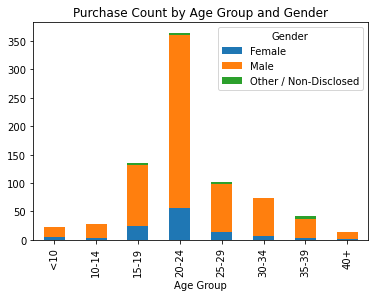

In [15]:
# Purchase Count by Age Group and Gender

age_bins = [0, 9, 14, 19, 24, 29, 34, 39, 100]
labels = ['<10', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40+']
purchase_dataset["Age Group"] = pd.cut(purchase_dataset["Age"], bins=age_bins, labels=labels)

gender_age = purchase_dataset.groupby(["Age Group", "Gender"])["Purchase ID"].count().unstack()
gender_age.plot(kind='bar', stacked=True, title="Purchase Count by Age Group and Gender")

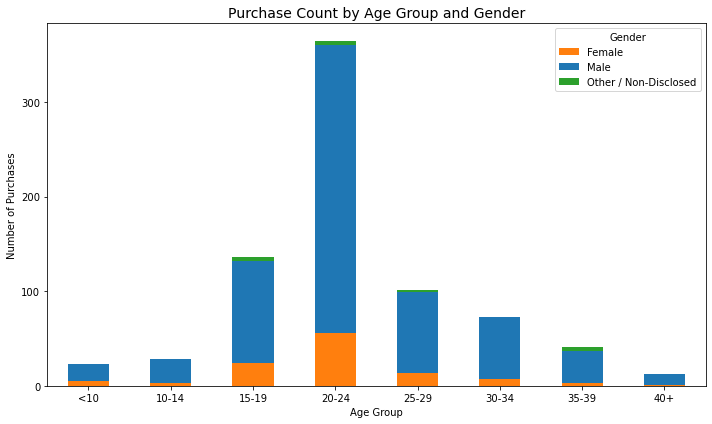

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# File to Load (Remember to Change These)
file_to_load = "Datasets/Game_Purchase_Dataset.csv"

# Read Purchasing File and store into Pandas data frame
purchase_dataset = pd.read_csv(file_to_load)

# Bin ages into groups
age_bins = [0, 9, 14, 19, 24, 29, 34, 39, 100]
labels = ['<10', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40+']
purchase_dataset["Age Group"] = pd.cut(purchase_dataset["Age"], bins=age_bins, labels=labels)

# Group by age group and gender
gender_age = purchase_dataset.groupby(["Age Group", "Gender"])["Purchase ID"].count().unstack()

# Custom colors for gender
custom_colors = {
    "Male": "#1f77b4",      # blue
    "Female": "#ff7f0e",    # orange
    "Other / Non-Disclosed": "#2ca02c"  # green
}

# Plot
ax = gender_age.plot(kind='bar', stacked=True, color=[custom_colors.get(col, "#cccccc") for col in gender_age.columns], figsize=(10, 6))

# Title and labels
ax.set_title("Purchase Count by Age Group and Gender", fontsize=14)
ax.set_xlabel("Age Group")
ax.set_ylabel("Number of Purchases")

# Format y-axis (e.g., 0, 100, 200...)
ax.yaxis.set_major_locator(ticker.MultipleLocator(100))  # Adjust increment as needed
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Center x-axis labels
plt.xticks(rotation=0, ha='center')

# Add legend with proper placement
plt.legend(title="Gender", loc='upper right')

plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Top 5 Items - Gender Breakdown'}, xlabel='Item ID'>

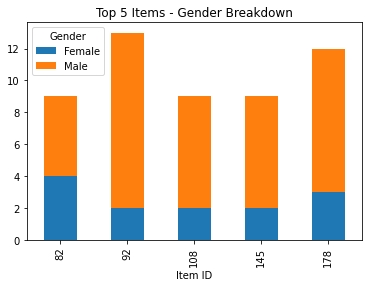

In [16]:
# Number of purchases by gender and top five items.

top_items = purchase_dataset["Item ID"].value_counts().head(5).index
filtered = purchase_dataset[purchase_dataset["Item ID"].isin(top_items)]
item_gender = filtered.groupby(["Item ID", "Gender"])["Purchase ID"].count().unstack()
item_gender.plot(kind='bar', stacked=True, title="Top 5 Items - Gender Breakdown")

<AxesSubplot:title={'center':'Revenue by Age Group and Gender'}, xlabel='Age Group'>

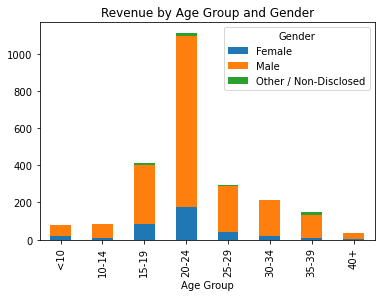

In [17]:
# Revenue by gender per age group.

gender_age_rev = purchase_dataset.groupby(["Age Group", "Gender"])["Price"].sum().unstack()
gender_age_rev.plot(kind='bar', stacked=True, title="Revenue by Age Group and Gender")

### Gender Demographics

Percentage and Count of Male Players

Percentage and Count of Female Players

Percentage and Count of Other / Non-Disclosed

In [18]:
# Create a new dataframe with just the player information




## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, average item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame

